In [1]:
import pandas as pd


tx_raw = pd.read_csv("transactions_in_Mobile_Internet_Banking.csv", encoding="cp1251", sep=";")
beh_raw = pd.read_csv("customer_behavior_patterns.csv", encoding="cp1251", sep=";")

tx_raw.head()

,Уникальный идентификатор клиента,Дата совершенной транзакции,Дата и время совершенной транзакции,Сумма совершенного перевода,Уникальный идентификатор транзакции,Зашифрованный идентификатор получателя/destination транзакции,"Размеченные транзакции(переводы), где 1 - мошенническая операция , 0 - чистая"
0,cst_dim_id,transdate,transdatetime,amount,docno,direction,target
1,2937833270,'2025-01-05 00:00:00.000','2025-01-05 16:32:02.000',31000.0,5343,8406e407421ec28bd5f445793ef64fd1,0
2,2096229005,'2025-03-04 00:00:00.000','2025-03-04 17:41:57.000',4000.0,8442,b3a3d4a6006293195d998957d4f01e42,0
3,2937759666,'2025-06-20 00:00:00.000','2025-06-20 10:08:07.000',3000.0,9540,22b84292f0ebce65ad0808342615a03b,0
4,2933493153,'2025-07-06 00:00:00.000','2025-07-06 14:52:13.000',500.0,11685,d677d4e1a0f625e1ad746ea950c9dca9,0


In [2]:
beh_raw.head()

,Дата совершенной транзакции,Уникальный идентификатор клиента,Количество разных версий ОС (os_ver) за последние 30 дней до transdate — сколько разных ОС/версий использовал клиент,Количество разных моделей телефона (phone_model) за последние 30 дней — насколько часто клиент “менял устройство” по логам,Модель телефона из самой последней сессии (по времени) перед transdate,Версия ОС из самой последней сессии перед transdate,Количество уникальных логин-сессий (минутных тайм-слотов) за последние 7 дней до transdate,Количество уникальных логин-сессий за последние 30 дней до transdate,Среднее число логинов в день за последние 7 дней: logins_last_7_days / 7,Среднее число логинов в день за последние 30 дней: logins_last_30_days / 30,"Относительное изменение частоты логинов за 7 дней к средней частоте за 30 дней:\n(freq7d?freq30d)/freq30d(freq_{7d} - freq_{30d}) / freq_{30d}(freq7d?freq30d)/freq30d — показывает, стал клиент заходить чаще или реже недавно",Доля логинов за 7 дней от логинов за 30 дней,Средний интервал (в секундах) между соседними сессиями за последние 30 дней,"Стандартное отклонение интервалов между логинами за 30 дней (в секундах), измеряет разброс интервалов","Дисперсия интервалов между логинами за 30 дней (в секундах?), ещё одна мера разброса","Экспоненциально взвешенное среднее интервалов между логинами за 7 дней, где более свежие сессии имеют больший вес (коэффициент затухания 0.3)",Показатель “взрывности” логинов: (std?mean)/(std+mean)(std - mean)/(std + mean)(std?mean)/(std+mean) для интервалов,Fano-factor интервалов: variance / mean,"Z-скор среднего интервала за последние 7 дней относительно среднего за 30 дней: насколько сильно недавние интервалы отличаются от типичных, в единицах стандартного отклонения"
0,transdate,cst_dim_id,monthly_os_changes,monthly_phone_model_changes,last_phone_model_categorical,last_os_categorical,logins_last_7_days,logins_last_30_days,login_frequency_7d,login_frequency_30d,freq_change_7d_vs_mean,logins_7d_over_30d_ratio,avg_login_interval_30d,std_login_interval_30d,var_login_interval_30d,ewm_login_interval_7d,burstiness_login_interval,fano_factor_login_interval,zscore_avg_login_interval_7d
1,'2025-03-05 00:00:00.000',453024373,2,2,Vivo V2116,Android/13,6,20,0.8571428571428571,0.6666666666666666,0.2857142857142857,0.3,131460.0,213919.47830901234,45761543200,23007.164409515124,0.23875037020941794,348102.41290126275,-0.22107383756651397
2,'2025-05-19 00:00:00.000',498636442,1,1,Xiaomi_m2006c3mg,Android/10,2,22,0.2857142857142857,0.7333333333333333,-0.6103896103896104,0.09090909090909091,101520.0,82733.72644157334,6844869490.909091,178980.0,-0.101958717043282,67423.85235332044,0.9362566311418639
3,'2025-08-04 00:00:00.000',2934905461,1,1,"iPhone16,1",iOS/18.5,2,2,0.2857142857142857,0.06666666666666667,3.2857142857142856,1.0,67800.0,-1.0,-1.0,67800.0,-1.0,-1.0,-1.0
4,'2025-03-05 00:00:00.000',456173125,1,2,Vivo V2058,Android/13,5,37,0.7142857142857143,1.2333333333333334,-0.42084942084942084,0.13513513513513514,61394.59459459459,76777.32139819076,5894757081.081081,9400.733944954127,0.11133034302281353,96014.26835710513,-0.5087386989189104


In [3]:
tx = tx_raw[tx_raw["Уникальный идентификатор клиента"] != "cst_dim_id"].copy()
beh = beh_raw[beh_raw["Уникальный идентификатор клиента"] != "cst_dim_id"].copy()

def parse_date(s):
    s = s.astype(str).str.replace("'", "").str.strip()
    return pd.to_datetime(s, errors="coerce")

tx["trans_date"] = parse_date(tx["Дата совершенной транзакции"])
beh["trans_date"] = parse_date(beh["Дата совершенной транзакции"])
tx["trans_datetime"] = parse_date(tx["Дата и время совершенной транзакции"])

amount_str = tx["Сумма совершенного перевода"].astype(str).str.replace(" ", "")
tx["amount"] = pd.to_numeric(amount_str, errors="coerce")

target_col = "Размеченные транзакции(переводы), где 1 - мошенническая операция , 0 - чистая"
tx[target_col] = tx[target_col].astype(int)

tx.head()

,Уникальный идентификатор клиента,Дата совершенной транзакции,Дата и время совершенной транзакции,Сумма совершенного перевода,Уникальный идентификатор транзакции,Зашифрованный идентификатор получателя/destination транзакции,"Размеченные транзакции(переводы), где 1 - мошенническая операция , 0 - чистая",trans_date,trans_datetime,amount
1,2937833270,'2025-01-05 00:00:00.000','2025-01-05 16:32:02.000',31000.0,5343,8406e407421ec28bd5f445793ef64fd1,0,2025-01-05,2025-01-05 16:32:02,31000.0
2,2096229005,'2025-03-04 00:00:00.000','2025-03-04 17:41:57.000',4000.0,8442,b3a3d4a6006293195d998957d4f01e42,0,2025-03-04,2025-03-04 17:41:57,4000.0
3,2937759666,'2025-06-20 00:00:00.000','2025-06-20 10:08:07.000',3000.0,9540,22b84292f0ebce65ad0808342615a03b,0,2025-06-20,2025-06-20 10:08:07,3000.0
4,2933493153,'2025-07-06 00:00:00.000','2025-07-06 14:52:13.000',500.0,11685,d677d4e1a0f625e1ad746ea950c9dca9,0,2025-07-06,2025-07-06 14:52:13,500.0
5,456000634,'2024-12-18 00:00:00.000','2024-12-18 14:12:25.000',20000.0,7128,87b698d1edae13c21ce86678de3b8546,0,2024-12-18,2024-12-18 14:12:25,20000.0


In [4]:
df = pd.merge(
    tx,
    beh,
    how="left",
    left_on=["Уникальный идентификатор клиента", "trans_date"],
    right_on=["Уникальный идентификатор клиента", "trans_date"],
    suffixes=("_tx", "_beh"),
)

df.head()

,Уникальный идентификатор клиента,Дата совершенной транзакции_tx,Дата и время совершенной транзакции,Сумма совершенного перевода,Уникальный идентификатор транзакции,Зашифрованный идентификатор получателя/destination транзакции,"Размеченные транзакции(переводы), где 1 - мошенническая операция , 0 - чистая",trans_date,trans_datetime,amount,...,Среднее число логинов в день за последние 30 дней: logins_last_30_days / 30,"Относительное изменение частоты логинов за 7 дней к средней частоте за 30 дней:\n(freq7d?freq30d)/freq30d(freq_{7d} - freq_{30d}) / freq_{30d}(freq7d?freq30d)/freq30d — показывает, стал клиент заходить чаще или реже недавно",Доля логинов за 7 дней от логинов за 30 дней,Средний интервал (в секундах) между соседними сессиями за последние 30 дней,"Стандартное отклонение интервалов между логинами за 30 дней (в секундах), измеряет разброс интервалов","Дисперсия интервалов между логинами за 30 дней (в секундах?), ещё одна мера разброса","Экспоненциально взвешенное среднее интервалов между логинами за 7 дней, где более свежие сессии имеют больший вес (коэффициент затухания 0.3)",Показатель “взрывности” логинов: (std?mean)/(std+mean)(std - mean)/(std + mean)(std?mean)/(std+mean) для интервалов,Fano-factor интервалов: variance / mean,"Z-скор среднего интервала за последние 7 дней относительно среднего за 30 дней: насколько сильно недавние интервалы отличаются от типичных, в единицах стандартного отклонения"
0,2937833270,'2025-01-05 00:00:00.000','2025-01-05 16:32:02.000',31000.0,5343,8406e407421ec28bd5f445793ef64fd1,0,2025-01-05,2025-01-05 16:32:02,31000.0,...,1.5333333333333334,0.21118012422360244,0.2826086956521739,49814.117647058825,106759.60669047953,11397613620.705883,18227.846188802367,0.3636976081673756,228802.8807708658,-0.21313414644761858
1,2096229005,'2025-03-04 00:00:00.000','2025-03-04 17:41:57.000',4000.0,8442,b3a3d4a6006293195d998957d4f01e42,0,2025-03-04,2025-03-04 17:41:57,4000.0,...,1.7666666666666666,-0.11051212938005389,0.20754716981132076,50667.857142857145,78912.7269079706,6227218468.051948,6872.638130014896,0.21797146518520444,122902.73990657259,0.026790898502448222
2,2937759666,'2025-06-20 00:00:00.000','2025-06-20 10:08:07.000',3000.0,9540,22b84292f0ebce65ad0808342615a03b,0,2025-06-20,2025-06-20 10:08:07,3000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2933493153,'2025-07-06 00:00:00.000','2025-07-06 14:52:13.000',500.0,11685,d677d4e1a0f625e1ad746ea950c9dca9,0,2025-07-06,2025-07-06 14:52:13,500.0,...,0.0,NaN,NaN,1350.0,1824.3354954612926,3328200.0,-1.0,0.14942828070300188,2465.3333333333335,-1.0
4,456000634,'2024-12-18 00:00:00.000','2024-12-18 14:12:25.000',20000.0,7128,87b698d1edae13c21ce86678de3b8546,0,2024-12-18,2024-12-18 14:12:25,20000.0,...,0.43333333333333335,1.3076923076923077,0.5384615384615384,213360.0,425545.9700196913,"1,81E+11",127828.03317618543,0.33210829132360686,848750.3402699663,-0.4085810047547966


In [5]:
client_col = "Уникальный идентификатор клиента"
dest_col = "Зашифрованный идентификатор получателя/destination транзакции"

df = df.sort_values([client_col, "trans_datetime"])

df["client_txn_count"] = df.groupby(client_col).cumcount() + 1
df["client_amount_sum"] = df.groupby(client_col)["amount"].cumsum()
df["client_amount_mean"] = df["client_amount_sum"] / df["client_txn_count"]

df["dest_txn_count"] = df.groupby(dest_col).cumcount() + 1
df["dest_amount_sum"] = df.groupby(dest_col)["amount"].cumsum()
df["dest_amount_mean"] = df["dest_amount_sum"] / df["dest_txn_count"]

df.head()

,Уникальный идентификатор клиента,Дата совершенной транзакции_tx,Дата и время совершенной транзакции,Сумма совершенного перевода,Уникальный идентификатор транзакции,Зашифрованный идентификатор получателя/destination транзакции,"Размеченные транзакции(переводы), где 1 - мошенническая операция , 0 - чистая",trans_date,trans_datetime,amount,...,"Экспоненциально взвешенное среднее интервалов между логинами за 7 дней, где более свежие сессии имеют больший вес (коэффициент затухания 0.3)",Показатель “взрывности” логинов: (std?mean)/(std+mean)(std - mean)/(std + mean)(std?mean)/(std+mean) для интервалов,Fano-factor интервалов: variance / mean,"Z-скор среднего интервала за последние 7 дней относительно среднего за 30 дней: насколько сильно недавние интервалы отличаются от типичных, в единицах стандартного отклонения",client_txn_count,client_amount_sum,client_amount_mean,dest_txn_count,dest_amount_sum,dest_amount_mean
8274,1286648072,'2024-12-01 00:00:00.000','2024-12-01 11:48:12.000',15000.0,5990,71a9bdfa4fd933d2adeceddb449dfa22,0,2024-12-01,2024-12-01 11:48:12,15000.0,...,48842.79831263919,0.16512948329792668,158140.8763912187,-0.4131465586743252,1.0,15000.0,15000.000000,1,15000.0,15000.0
752,1286648072,'2024-12-01 00:00:00.000','2024-12-01 15:55:26.000',20000.0,6069,a0058777650c8e08b9c79023de9d6173,0,2024-12-01,2024-12-01 15:55:26,20000.0,...,48842.79831263919,0.16512948329792668,158140.8763912187,-0.4131465586743252,2.0,35000.0,17500.000000,1,20000.0,20000.0
8203,1286648072,'2024-12-01 00:00:00.000','2024-12-01 16:08:40.000',38000.0,4498,a0058777650c8e08b9c79023de9d6173,0,2024-12-01,2024-12-01 16:08:40,38000.0,...,48842.79831263919,0.16512948329792668,158140.8763912187,-0.4131465586743252,3.0,73000.0,24333.333333,2,58000.0,29000.0
5229,1286648072,'2024-12-03 00:00:00.000','2024-12-03 18:38:46.000',17000.0,11918,a0058777650c8e08b9c79023de9d6173,0,2024-12-03,2024-12-03 18:38:46,17000.0,...,16688.554636764275,0.12678915806537508,155214.99942925634,-0.3929610228647835,4.0,90000.0,22500.000000,3,75000.0,25000.0
2504,1286648072,'2024-12-19 00:00:00.000','2024-12-19 18:16:46.000',5000.0,1650,d3a5ad31b1939518bd295eb0ad64e5ea,0,2024-12-19,2024-12-19 18:16:46,5000.0,...,-1.0,0.177495039275506,161211.14495383887,-1.0,5.0,95000.0,19000.000000,1,5000.0,5000.0


In [6]:
import numpy as np


numeric_features = [
    "amount",
    "client_txn_count",
    "client_amount_sum",
    "client_amount_mean",
    "dest_txn_count",
    "dest_amount_sum",
    "dest_amount_mean",
]

force_category = [
    "Модель телефона из самой последней сессии (по времени) перед transdate",
    "Версия ОС из самой последней сессии перед transdate",
    dest_col,
]

skip_cols = [
    target_col,
    client_col,
    "trans_date",
    "trans_datetime",
    "Дата совершенной транзакции_tx",
    "Дата совершенной транзакции_beh",
    "Дата и время совершенной транзакции",
    "Сумма совершенного перевода",
    "Уникальный идентификатор транзакции",

    "client_txn_count",
    "client_amount_sum",
    "client_amount_mean",
    "dest_txn_count",
    "dest_amount_sum",
    "dest_amount_mean",
]

beh_candidate = []

for col in df.columns:
    if col not in skip_cols and col not in force_category:
        beh_candidate.append(col)

for col in beh_candidate:
    df[col] = pd.to_numeric(df[col], errors="coerce")

numeric_candidates = []

for col in beh_candidate:
    if df[col].dtype == "float64" or df[col].dtype == "int64":
        numeric_candidates.append(col)

i = 0
while i < len(numeric_candidates):
    col = numeric_candidates[i]
    if col not in numeric_features:
        numeric_features.append(col)
    i += 1

cat_cols = force_category.copy()

for c in cat_cols:
    df[c] = df[c].astype("category")

i = 0
while i < len(numeric_features):
    col = numeric_features[i]
    median_val = df[col].median()
    df[col] = df[col].fillna(median_val)
    i += 1

i = 0
while i < len(cat_cols):
    c = cat_cols[i]
    df[c] = df[c].cat.add_categories(["__MISSING__"]).fillna("__MISSING__")
    i += 1

feature_cols = numeric_features + cat_cols

X = df[feature_cols]
y = df[target_col].values

X.head()

,amount,client_txn_count,client_amount_sum,client_amount_mean,dest_txn_count,dest_amount_sum,dest_amount_mean,Количество разных версий ОС (os_ver) за последние 30 дней до transdate — сколько разных ОС/версий использовал клиент,Количество разных моделей телефона (phone_model) за последние 30 дней — насколько часто клиент “менял устройство” по логам,Количество уникальных логин-сессий (минутных тайм-слотов) за последние 7 дней до transdate,...,Средний интервал (в секундах) между соседними сессиями за последние 30 дней,"Стандартное отклонение интервалов между логинами за 30 дней (в секундах), измеряет разброс интервалов","Дисперсия интервалов между логинами за 30 дней (в секундах?), ещё одна мера разброса","Экспоненциально взвешенное среднее интервалов между логинами за 7 дней, где более свежие сессии имеют больший вес (коэффициент затухания 0.3)",Показатель “взрывности” логинов: (std?mean)/(std+mean)(std - mean)/(std + mean)(std?mean)/(std+mean) для интервалов,Fano-factor интервалов: variance / mean,"Z-скор среднего интервала за последние 7 дней относительно среднего за 30 дней: насколько сильно недавние интервалы отличаются от типичных, в единицах стандартного отклонения",Модель телефона из самой последней сессии (по времени) перед transdate,Версия ОС из самой последней сессии перед transdate,Зашифрованный идентификатор получателя/destination транзакции
8274,15000.0,1.0,15000.0,15000.000000,1,15000.0,15000.0,1.0,1.0,10.0,...,81195.882353,113315.435818,1.284039e+10,48842.798313,0.165129,158140.876391,-0.413147,"iPhone14,5",iOS/18.0,71a9bdfa4fd933d2adeceddb449dfa22
752,20000.0,2.0,35000.0,17500.000000,1,20000.0,20000.0,1.0,1.0,10.0,...,81195.882353,113315.435818,1.284039e+10,48842.798313,0.165129,158140.876391,-0.413147,"iPhone14,5",iOS/18.0,a0058777650c8e08b9c79023de9d6173
8203,38000.0,3.0,73000.0,24333.333333,2,58000.0,29000.0,1.0,1.0,10.0,...,81195.882353,113315.435818,1.284039e+10,48842.798313,0.165129,158140.876391,-0.413147,"iPhone14,5",iOS/18.0,a0058777650c8e08b9c79023de9d6173
5229,17000.0,4.0,90000.0,22500.000000,3,75000.0,25000.0,1.0,1.0,11.0,...,93215.172414,120284.632988,1.446839e+10,16688.554637,0.126789,155214.999429,-0.392961,"iPhone14,5",iOS/18.0,a0058777650c8e08b9c79023de9d6173
2504,5000.0,5.0,95000.0,19000.000000,1,5000.0,5000.0,1.0,1.0,1.0,...,78660.000000,112609.363119,1.268087e+10,-1.000000,0.177495,161211.144954,-1.000000,"iPhone14,5",iOS/18.0,d3a5ad31b1939518bd295eb0ad64e5ea


In [7]:
order = np.argsort(df["trans_datetime"].values.astype("datetime64[ns]"))

X_sorted = X.iloc[order].reset_index(drop=True)
y_sorted = y[order]

cut = int(len(X_sorted) * 0.8)

X_train = X_sorted.iloc[:cut]
y_train = y_sorted[:cut]
X_val = X_sorted.iloc[cut:]
y_val = y_sorted[cut:]

len(X_train), len(X_val)

(10512, 2628)

In [8]:
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import roc_auc_score


cat_idx = []
i = 0
while i < len(cat_cols):
    c = cat_cols[i]
    idx = feature_cols.index(c)
    cat_idx.append(idx)
    i = i + 1

train_pool = Pool(X_train, y_train, cat_features=cat_idx)
val_pool = Pool(X_val, y_val, cat_features=cat_idx)

cat_model = CatBoostClassifier(
    loss_function="Logloss",
    eval_metric="AUC",
    iterations=800,
    learning_rate=0.05,
    depth=6,
    class_weights=[1.0, 15.0],
    random_seed=42,
    verbose=100
)

cat_model.fit(train_pool, eval_set=val_pool, use_best_model=True)

proba_cat = cat_model.predict_proba(val_pool)[:, 1]
print("CatBoost AUC:", roc_auc_score(y_val, proba_cat))

0:	test: 0.8661616	best: 0.8661616 (0)	total: 115ms	remaining: 1m 32s
100:	test: 0.9289391	best: 0.9308396 (61)	total: 3.52s	remaining: 24.4s
200:	test: 0.9265650	best: 0.9308396 (61)	total: 7.04s	remaining: 21s
300:	test: 0.9263424	best: 0.9308396 (61)	total: 10.5s	remaining: 17.4s
400:	test: 0.9266248	best: 0.9308396 (61)	total: 14.3s	remaining: 14.2s
500:	test: 0.9265716	best: 0.9308396 (61)	total: 18.1s	remaining: 10.8s
600:	test: 0.9247475	best: 0.9308396 (61)	total: 21.9s	remaining: 7.27s
700:	test: 0.9240331	best: 0.9308396 (61)	total: 26.1s	remaining: 3.69s
799:	test: 0.9227107	best: 0.9308396 (61)	total: 30.2s	remaining: 0us

bestTest = 0.9308396465
bestIteration = 61

Shrink model to first 62 iterations.
CatBoost AUC: 0.9308396464646465


In [9]:
X_train_xgb = X_train.copy()
X_val_xgb = X_val.copy()

i = 0
while i < len(cat_cols):
    c = cat_cols[i]
    X_train_xgb[c] = X_train_xgb[c].cat.codes
    X_val_xgb[c] = X_val_xgb[c].cat.codes
    i = i + 1

print("XGBoost shapes:", X_train_xgb.shape, X_val_xgb.shape)

XGBoost shapes: (10512, 25) (2628, 25)


In [10]:
import xgboost as xgb


xgb_model = xgb.XGBClassifier(
    objective="binary:logistic",
    eval_metric="auc",
    learning_rate=0.05,
    max_depth=6,
    n_estimators=150,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=15,
    random_state=42,
    tree_method="hist"
)

xgb_model.fit(
    X_train_xgb,
    y_train,
    eval_set=[(X_val_xgb, y_val)],
    verbose=50
)

proba_xgb = xgb_model.predict_proba(X_val_xgb)[:, 1]
print("XGBoost AUC:", roc_auc_score(y_val, proba_xgb))

[0]	validation_0-auc:0.84227
[50]	validation_0-auc:0.90552
[100]	validation_0-auc:0.92311
[149]	validation_0-auc:0.91977
XGBoost AUC: 0.9197700691121744


In [11]:
from sklearn.metrics import roc_auc_score, precision_recall_fscore_support, fbeta_score, classification_report, confusion_matrix


def evaluate(proba, y_true, name):
    print("==========", name, "==========")
    auc = roc_auc_score(y_true, proba)
    print("AUC:", auc)

    preds_05 = (proba >= 0.5).astype(int)
    print("\nClassification report @0.5:\n")
    print(classification_report(y_true, preds_05))

    best_thr = 0.5
    best_f2 = 0.0

    thr_values = np.linspace(0.01, 0.5, 200)
    for thr in thr_values:
        preds = (proba >= thr).astype(int)
        f2 = fbeta_score(y_true, preds, beta=2)
        if f2 > best_f2:
            best_f2 = f2
            best_thr = thr

    print(f"Best threshold by F2: {best_thr:.3f}, F2 = {best_f2:.4f}")

    preds_best = (proba >= best_thr).astype(int)
    prec, rec, f1, _ = precision_recall_fscore_support(
        y_true, preds_best, average="binary"
    )

    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1-score:  {f1:.4f}")

    print("\nConfusion matrix @best_thr:")
    print(confusion_matrix(y_true, preds_best))
    print("====================================\n")


evaluate(proba_cat, y_val, "CatBoost")
evaluate(proba_xgb, y_val, "XGBoost")

proba_ens = 0.6 * proba_cat + 0.4 * proba_xgb
evaluate(proba_ens, y_val, "Ensemble 0.6*CatBoost + 0.4*XGBoost")

========== CatBoost ==========
AUC: 0.9308396464646465

Classification report @0.5:

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2508
           1       0.68      0.21      0.32       120

    accuracy                           0.96      2628
   macro avg       0.82      0.60      0.65      2628
weighted avg       0.95      0.96      0.95      2628

Best threshold by F2: 0.012, F2 = 0.5660
Precision: 0.2278
Recall:    0.9000
F1-score:  0.3636

Confusion matrix @best_thr:
[[2142  366]
 [  12  108]]

========== XGBoost ==========
AUC: 0.9197700691121744

Classification report @0.5:

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2508
           1       0.56      0.08      0.14       120

    accuracy                           0.96      2628
   macro avg       0.76      0.54      0.56      2628
weighted avg       0.94      0.96      0.94      2628

Best threshold by F2: 0.0

In [33]:
df.to_csv("final_processed_table.csv", index=False)

In [34]:
import json
import pickle
from catboost import CatBoostClassifier


best_model_path = "catboost_fraud_model.cbm"
cat_model.save_model(best_model_path)
print("Saved model to:", best_model_path)


feature_path = "feature_columns.json"
with open(feature_path, "w", encoding="utf-8") as f:
    json.dump(feature_cols, f, ensure_ascii=False, indent=2)

print("Saved feature list to:", feature_path)


cat_path = "categorical_columns.json"
with open(cat_path, "w", encoding="utf-8") as f:
    json.dump(cat_cols, f, ensure_ascii=False, indent=2)

print("Saved categorical feature list to:", cat_path)



category_maps = {}

for col in cat_cols:
    category_maps[col] = list(df[col].cat.categories)

with open("category_maps.pkl", "wb") as f:
    pickle.dump(category_maps, f)

print("Saved category maps to: category_maps.pkl")

Saved model to: catboost_fraud_model.cbm
Saved feature list to: feature_columns.json
Saved categorical feature list to: categorical_columns.json
Saved category maps to: category_maps.pkl


Top-20 feature_importances:


,feature,importance
4,dest_txn_count,22.065277
6,dest_amount_mean,12.402516
24,Зашифрованный идентификатор получателя/destina...,7.992294
5,dest_amount_sum,7.642282
0,amount,7.304349
2,client_amount_sum,3.924462
3,client_amount_mean,3.885441
20,Fano-factor интервалов: variance / mean,3.625526
16,Стандартное отклонение интервалов между логина...,3.195019
14,Доля логинов за 7 дней от логинов за 30 дней,3.178537


C:\Users\user\AppData\Local\Temp\ipykernel_18272\3010165368.py:25: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


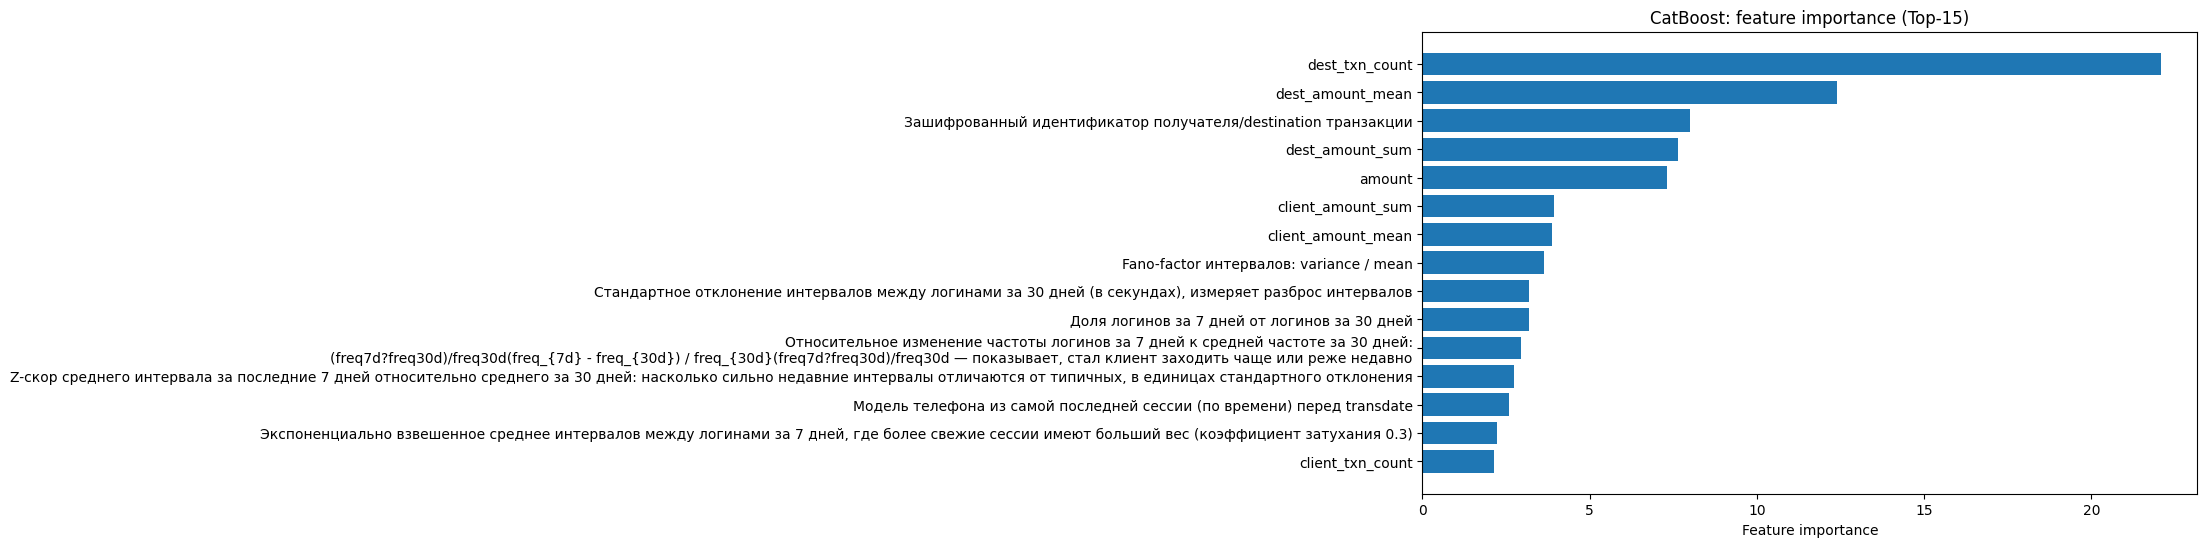

In [12]:
import pandas as pd
import matplotlib.pyplot as plt


fi_values = cat_model.get_feature_importance(
    train_pool,
    type="FeatureImportance")

fi_df = pd.DataFrame(
    {
        "feature": feature_cols,
        "importance": fi_values
    }
).sort_values("importance", ascending=False)

print("Top-20 feature_importances:")
display(fi_df.head(20))

top_n = 15
top_fi = fi_df.head(top_n)
plt.figure(figsize=(10, 6))
plt.barh(top_fi["feature"][::-1], top_fi["importance"][::-1])
plt.xlabel("Feature importance")
plt.title("CatBoost: feature importance (Top-15)")
plt.tight_layout()
plt.show()

Top-20 features by average |SHAP|:


,feature,mean_abs_shap
24,Зашифрованный идентификатор получателя/destina...,0.978984
4,dest_txn_count,0.499436
6,dest_amount_mean,0.333597
0,amount,0.206181
2,client_amount_sum,0.156794
5,dest_amount_sum,0.129454
22,Модель телефона из самой последней сессии (по ...,0.126309
20,Fano-factor интервалов: variance / mean,0.126069
3,client_amount_mean,0.121858
21,Z-скор среднего интервала за последние 7 дней ...,0.080566


C:\Users\user\AppData\Local\Temp\ipykernel_18272\20772614.py:37: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


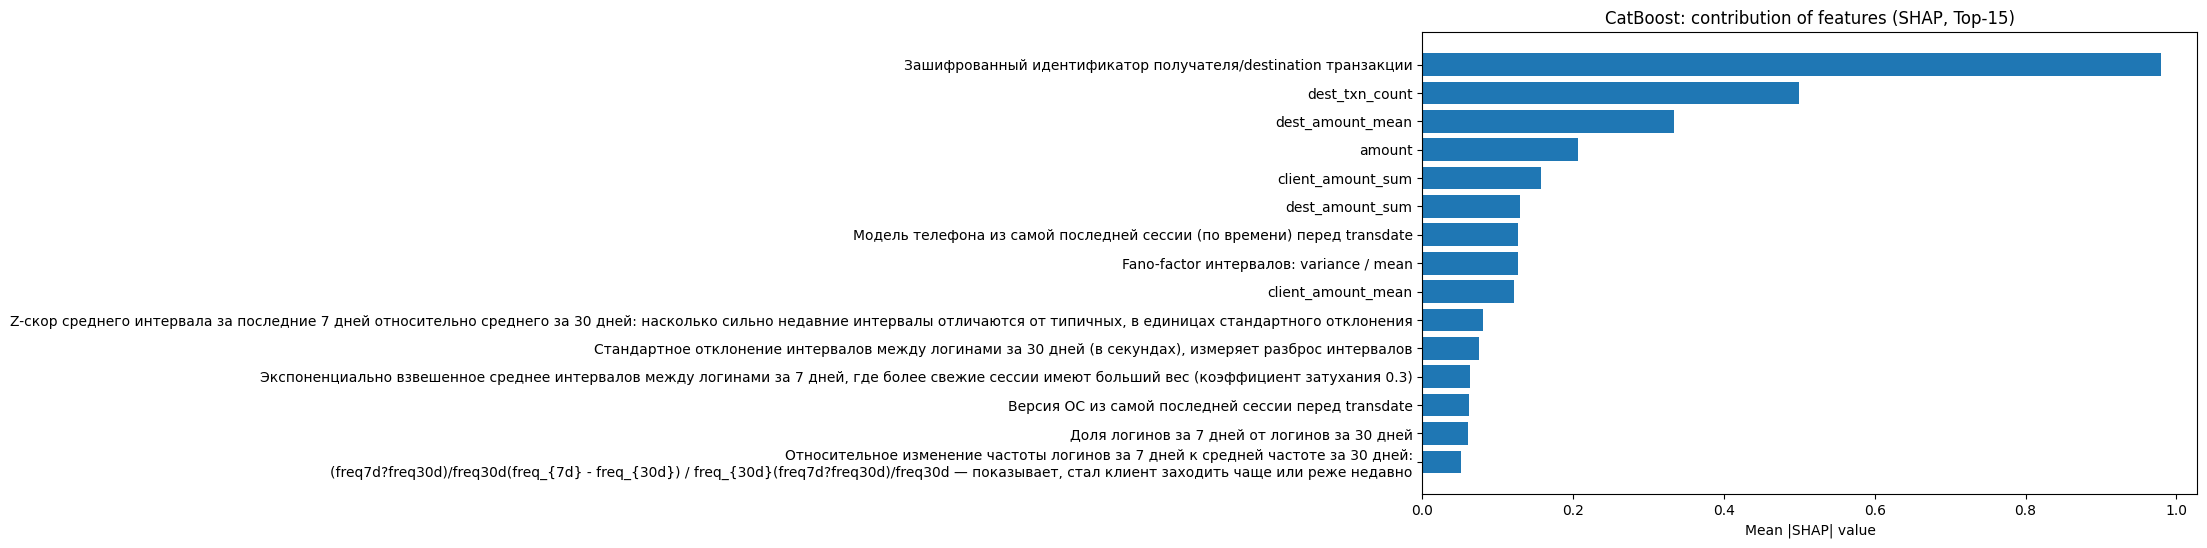

In [13]:
max_rows = 500
val_sub = val_pool

if len(X_val) > max_rows:
    val_idx = np.arange(max_rows)
    val_sub = Pool(
        X_val.iloc[val_idx],
        y_val[val_idx],
        cat_features=cat_idx
    )

shap_values = cat_model.get_feature_importance(
    val_sub,
    type="ShapValues")
shap_base = shap_values[:, -1]
shap_feat = shap_values[:, :-1]

mean_abs_shap = np.mean(np.abs(shap_feat), axis=0)

shap_df = pd.DataFrame(
    {
        "feature": feature_cols,
        "mean_abs_shap": mean_abs_shap
    }
).sort_values("mean_abs_shap", ascending=False)

print("Top-20 features by average |SHAP|:")
display(shap_df.head(20))

top_n = 15
top_shap = shap_df.head(top_n)

plt.figure(figsize=(10, 6))
plt.barh(top_shap["feature"][::-1], top_shap["mean_abs_shap"][::-1])
plt.xlabel("Mean |SHAP| value")
plt.title("CatBoost: contribution of features (SHAP, Top-15)")
plt.tight_layout()
plt.show()